# Exploration and Formatting
This notebook will take a quick walk through the data, and I will convert it to a JSON in a JavaScript file so I can so a purely front-end application for this toy project. 

Assignment instructions [here](https://docs.google.com/document/d/1fx12zs5CdAQTVR995iSuuFXs0VU8TvA0kmhF3txowDs/edit)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

**Note:** if you are trying to re-run this in a notebook (or lab), you will need to follow the instructions [here](https://plotly.com/python/getting-started/) to ensure you have the correct packages (`ipywidgets`) and Jupyter Lab Extensions installed. 

## Load and Clean Data

In [2]:
# Open the data
df = pd.read_csv("data_aug27.csv")

In [3]:
# Per the assignment, trim to only relevant cols
df = df[["customer_number", "day_part", "first_seen_utc", "tts"]]
df.head()

,customer_number,day_part,first_seen_utc,tts
0,0,1,1596464356,257
1,1,1,1596490275,309
2,2,1,1596490412,257
3,3,1,1596466846,263
4,4,1,1596467373,165


In [4]:
# How big is it?
df.shape

(3187, 4)

In [5]:
# Is there any missing data
df.isnull().sum(axis=0)

customer_number    0
day_part           0
first_seen_utc     0
tts                0
dtype: int64

Now, this is not especially robust, but the data is not too large, so to make sure there are no odd values (e.g., -1 times) I just scrolled through it quickly and did a visual search. If this were real-world, I would be more thourough. 

In [6]:
# Conver the epoch to more readable date
df['date'] = pd.to_datetime(df.first_seen_utc, unit='s')

## Explore Data
Lets just do a few quick plots to get a feel for what we are working with, and to brainstorm how we may best display this interactively

In [7]:
df.head()

,customer_number,day_part,first_seen_utc,tts,date
0,0,1,1596464356,257,2020-08-03 14:19:16
1,1,1,1596490275,309,2020-08-03 21:31:15
2,2,1,1596490412,257,2020-08-03 21:33:32
3,3,1,1596466846,263,2020-08-03 15:00:46
4,4,1,1596467373,165,2020-08-03 15:09:33


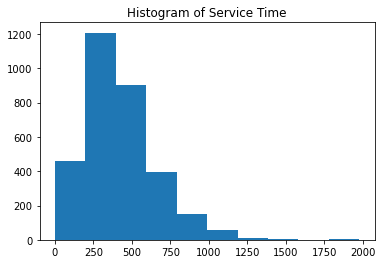

In [8]:
# Lets see how service time breaks down
plt.hist(df.tts)
plt.title("Histogram of Service Time")
plt.show()

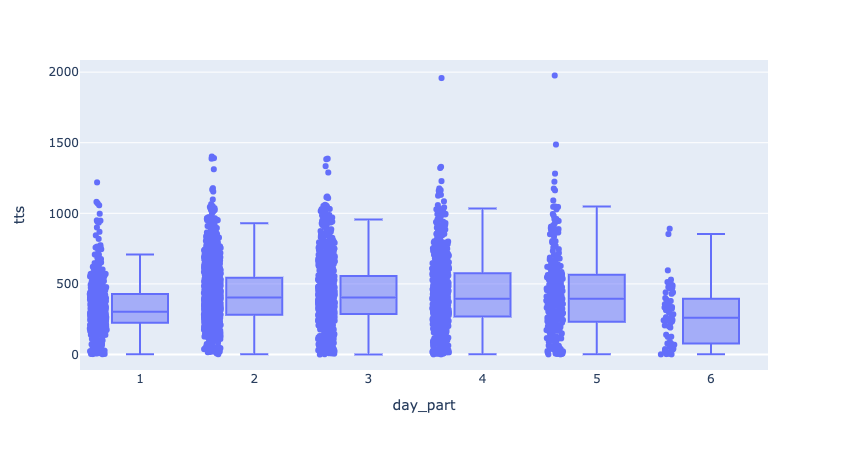

In [15]:
# Lets see how that breaks down by time of day
fig = px.box(df, x="day_part", y="tts", points='all')
fig.show()

In [16]:
# What is our date range?
df.date.describe()

count                    3187
unique                   3118
top       2020-08-23 02:01:51
freq                        4
first     2020-08-03 14:19:16
last      2020-08-26 05:14:10
Name: date, dtype: object

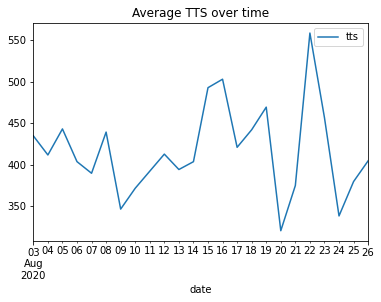

In [25]:
# How does the average change over time
df[['date', 'tts']].groupby(pd.Grouper(key='date', freq='d')).mean().plot()
plt.title("Average TTS over time")
plt.show()

In [29]:
# Break it out further so we can break out multiple trends
df2 = df.copy()
df2['day'] = df2.date.dt.date
grouped = df2[['day', 'day_part', 'tts']].groupby(by=['day', 'day_part']).mean().reset_index()

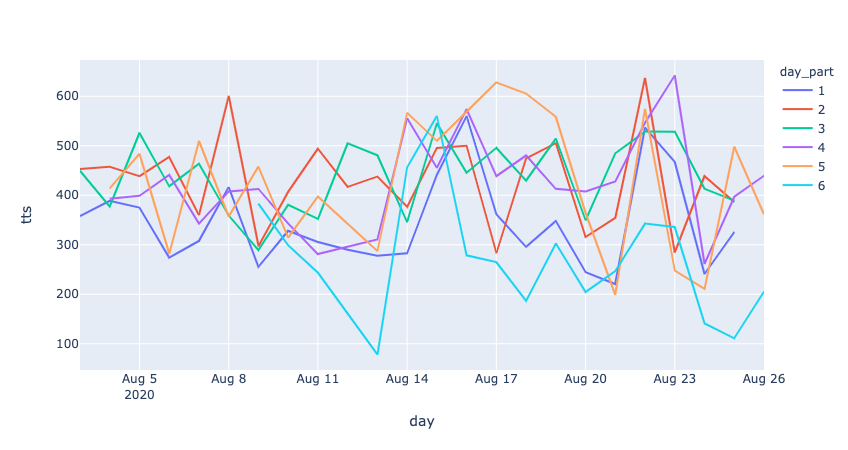

In [38]:
# Plot it
fig = px.line(grouped, x="day", y="tts", color='day_part')
fig.show()

In [40]:
# Lets try it by Day of week, maybe we will see a trend there
df3 = df.copy()
df3['day'] = df3.date.dt.dayofweek

In [41]:
grouped2 = df3[['day', 'tts', 'day_part']].groupby(by=['day', 'day_part']).mean().reset_index()

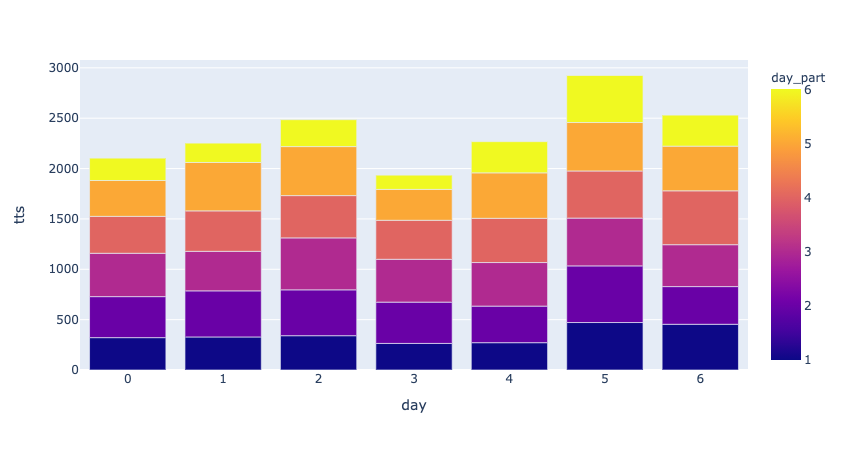

In [45]:
fig = px.bar(grouped2, x="day", y="tts", color='day_part')
fig.show()

This is slightly more interesting, we see a slight variation in the day of week, and we see a range, i.e., late nights seem to be doing much better on the weekends (not surprising).

## Next Steps

So I am envisioning a dashboard with a main scatter plot that shows a point for each person and the time they spend being processed. I want to be able to group, color, and size the dots. I think it would be neat to be able to color the dots by the time of day, group by the date, day of week, or time of day. 

In [48]:
# Save data as JSON in JavaScript file
f = open('data.js', 'w+')
f.write('var data = ' + df.to_json(orient='records') + ';')
f.close()